Order of Polynomial?? 4
The value of Chi-squre-  [62.99045423]
Uncertainty in the coefficients [9.99475312e-01 6.94392867e+02 6.30282745e+03 1.50870812e+04
 1.01790540e+04]


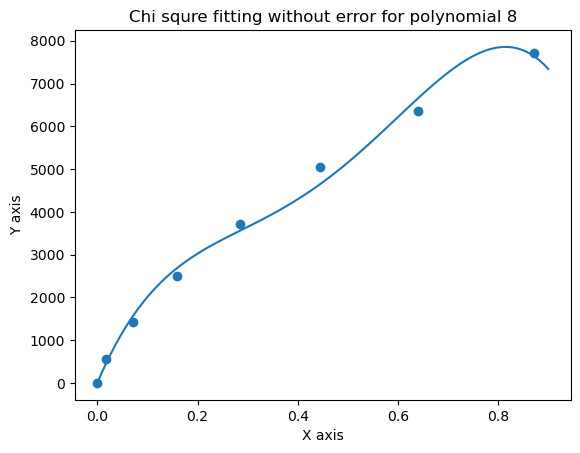

In [1]:
"""
Created on Tue Dec  6 18:13:43 2022
@author: samim
"""
import numpy as np
import pylab as pl
x,y,e=np.loadtxt("CS1.dat",unpack=True)
n=int(input("Order of Polynomial?? "))
C=np.zeros((n+1,1))
P=np.zeros((n+1,n+1))
#Forming the main MAtrix
for j in range(0,n+1):
    l=j
    for k in range(0,n+1):
        s=0
        for i in range(0,len(x)):
            s=s+((x[i]**l)/(e[i]**2))
        
        P[j,k]=s
        l=l+1
        
#Forming the Y Matrix
for j in range(0,n+1):
    s3=0
    for i in range(0,len(x)):
        s3=s3+(y[i]/(e[i]**2))*(x[i]**j)
    C[j,0]=s3
    
#Solving the matrix
A=np.linalg.solve(P, C)

#Calculating the value of Chi-squre
Chi=0
for i in range(0,len(x)):
    s2=0
    for k in range(0,n+1):
        s2=s2+A[k]*(x[i]**k)
    Chi=Chi+((y[i]-s2)/e[i])**2
print("The value of Chi-squre- ",Chi)

#Uncertainty in the coefficients
B=np.linalg.inv(P)
print("Uncertainty in the coefficients",np.sqrt(np.diag(B)))

#Plot and fit
Z=[]
u=np.linspace(0, 0.9, 100)
for i in range(0,100):
    s4=0
    for j in range(0,n+1):
        s4=s4+(A[j]*((u[i])**j))
    Z.append(s4)
pl.scatter(x,y)
pl.xlabel("X axis")
pl.ylabel("Y axis")
pl.title("Chi squre fitting without error for polynomial 8")
pl.plot(u,Z)
pl.show()
